In [3]:
def reg_lineal_multiple(ruta, grafico = False):
    #importamos librerias
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    import statsmodels.api as sm
    from numpy.linalg import inv

    df = pd.read_csv(ruta)
    print("\nEl dataset actual es:\n")
    print(df.head(3))
    term_dep = int(input("\nIngrese el número de columna que sera el termino dependiente, \nsiendo 0 la primer columna, 1 la segunda y asi sucesivamente: "))
    #asignar las variables x e y:
    eliminar_columna = str(input("\nDesea eliminar alguna columna? Ingrese SI o NO: "))
    eliminar_columna = eliminar_columna.lower()
    if eliminar_columna == "si":
        columna_eliminada = int(input("\nIngrese número de columna a eliminar: "))
        y = df[df.columns[int(term_dep)]]
        x = df.drop([df.columns[term_dep], df.columns[columna_eliminada]], axis=1)
        print("\nLas variables dependientes estaran dadas por las siguientes columnas: \n")
        print(x.head(3))
        eliminar_otra = str(input("\nDesea eliminar otra columna? Ingrese SI o NO: "))
        eliminar_otra = eliminar_otra.lower()
        while eliminar_otra == "si":
            otra_columna_eliminada = int(input("\nIngrese número de columna a eliminar: "))
            x = x.drop([x.columns[otra_columna_eliminada]], axis=1)
            print("Las variables dependientes estaran dadas por las siguientes columnas: \n")
            print(x.head(3))
            eliminar_otra = str(input("\nDesea eliminar otra columna? Ingrese SI o NO: "))
            eliminar_otra = eliminar_otra.lower()
        
        else:
            pass
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, shuffle=True)       
    else:
        y = df[df.columns[int(term_dep)]]
        x = df.drop([df.columns[term_dep]], axis=1)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, shuffle=True)
        
    print("\nCoeficientes de la regresión lineal para el dataset seleccionado:\n")
    
    #Obtención de los coeficientes de la regresión lineal:
    x_train = sm.add_constant(x_train, prepend=True)
    nmp=x_train.to_numpy()
    nmp_traspuesta = nmp.transpose()
    inversa = inv(nmp_traspuesta.dot(nmp))
    y_nmp=y_train.to_numpy()
    traspuestaxy = nmp_traspuesta.dot(y_nmp)
    a = inversa.dot(traspuestaxy)
    
    for i in range(len(a)-1):
        print("coeficiente ", i," : ", a[i])
    #Grafico de la recta de la regresión lineal:    
    if grafico:
        x_test = sm.add_constant(x_test, prepend=True)
        #Predecimos los valores de y para nuestra ecuación de la regresión:
        y_predict = []
        for i in range(len(x_test.index)):
            valor = 0
            for coef in range(len(x_test.columns)):
                valor += a[coef]*x_test.iat[i, coef]
            y_predict.append(valor)
        y_predict
        
        plt.figure(figsize = (10,5))
        plt.scatter(y_test, y_predict)
        plt.plot(y_predict, y_predict, color='red')
        plt.show()
    else:
        pass
    
    columns_names = x.columns.values
    columns_names_list = list(columns_names)
    preguntar_predecir = str(input("\nDesea predecir su chance de ingreso? Ingrese SI o NO: ")).lower()
    if preguntar_predecir == "si":
        valor_prediccion = 0
        valores = [1]
        for nombrecolumna in columns_names_list:
            agregar = float(input(f"Ingrese un valor para {nombrecolumna}: "))
            valores.append(agregar)
        for coef in range(len(valores)):
            valor_prediccion += a[coef]*valores[coef]
        print("\nLa chance de ingresar a la universidad es:", valor_prediccion, "\n")
    
    print("\nLa ecuación de la regresión lineal es:\n")
    texto0 = "y = {}".format(round(a[0], 4))
    print(texto0, end="")
    for i in range(1, len(a)):
        texto = " + {} x_{}".format(round(a[i], 4), i)
        print(texto, end ="")

Ingrese la ruta del dataset: C:\Users\matia\OneDrive\Escritorio\Curso_The_Corner\jamboree\jamboree_dataset.csv

El dataset actual es:

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  

Ingrese el número de columna que sera el termino dependiente, 
siendo 0 la primer columna, 1 la segunda y asi sucesivamente: 8

Desea eliminar alguna columna? Ingrese SI o NO: si

Ingrese número de columna a eliminar: 0

Las variables dependientes estaran dadas por las siguientes columnas: 

   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0        337          118                  4  4.5   4.5  9.65 

C:\Users\matia\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


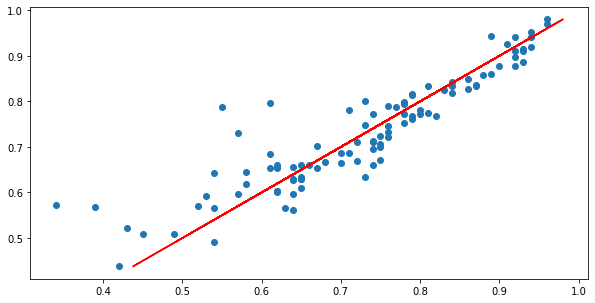


Desea predecir su chance de ingreso? Ingrese SI o NO: no

La ecuación de la regresión lineal es:

y = -1.2887 + 0.0018 x_1 + 0.0032 x_2 + 0.0061 x_3 + 0.003 x_4 + 0.0144 x_5 + 0.1167 x_6 + 0.0199 x_7

In [4]:
ruta = str(input("Ingrese la ruta del dataset: "))

reg_lineal_multiple(ruta, True)